
Authors: Nazanin Moshtagh 400046822 and Aditya Goel 400414715

SEP787 Project: Machine Learning- Classification Models

References: 
1. Dr. Jeff Fortuna's SEP 787 Lecture Notes
2. https://scikit-learn.org/



##**Import Libraries**

In [ ]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

##**Preparing the Dataset**

In [ ]:
def import_dataset(file):
  df = pd.read_csv(file, delimiter = ";", header=None)
  len_df = len(df)
  return df

df = import_dataset("winequality-white.csv")
dataset = df.values

labels = []
data = []

for i in range(len(dataset)):
  data.append(dataset[i][0:11])
  if dataset[i][11]>=6 :
    labels.append(1)
  if dataset[i][11]<=5 :
    labels.append(0)

data = np.array(data)
labels = np.array(labels)

##**Normalizing the data**

In [ ]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

##**Splitting the Dataset**

In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25) # 75% training and 25% test

In [ ]:
def calc_time(data, start, end):
  time = (end - start)
  print("The Computational Time for " +data+ " the model (in s) = ", time)

##**ROC curve plot function**

In [ ]:
def plot_roc2(y, probability):
  
  threshold_values = np.linspace(0,2,100)                                       #Range of threshold Values
  FPR_array = []
  TPR_array = []

  for threshold in threshold_values:
    y_pred = []

    for p in probability:                                                       #For probability vector of every datapoint
      if ((p[1])<threshold):                                                    
        y_pred.append(0)                                                        #If predicted probability < threshold, classify as 0
        continue
      elif ((p[1])>=threshold): y_pred.append(1)                                #else 1

    conf_matrix = confusion_matrix(y, y_pred)
    TN = conf_matrix[0][0]                                                      #Obtain True Negative
    FP = conf_matrix[0][1]                                                      #Obtain False Positive
    FN = conf_matrix[1][0]                                                      #Obtain False Negative    
    TP = conf_matrix[1][1]                                                      #Obtain True Positive

    FPR = FP/(FP + TN)                                                          #Compute False Positive Rate
    TPR = TP/(TP + FN)                                                          #Compute True Positive Rate

    FPR_array.append(FPR)
    TPR_array.append(TPR)

  fig = plt.figure()
  plt.plot(FPR_array, TPR_array, color= 'red')                                  #Plot ROC
  plt.axis([0,1,0,1])
  plt.ylabel('TPR')
  plt.xlabel('FPR')
  plt.title('ROC Curve')
  plt.savefig('ROC')
  plt.show()

##**Funcion for Confusion Matrix**

In [ ]:
def calc_metric(data, actual, predicted):
  conf_matrix = confusion_matrix(actual, predicted)                             #Confusion Matrix
  accuracy = accuracy_score(actual, predicted)                                  #Accuracy
  disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
  disp.plot()
  plt.show()

  print('Results for '+data+' data\n')
  print('Confusion Matrix is:\n', conf_matrix)
  print('\nAccuracy is:\n', accuracy)

##**Cross Validation for parameter tunning and Training phase**

Best paramteres set found:

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


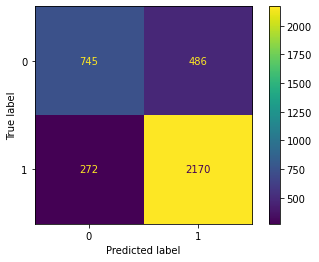

Results for training data

Confusion Matrix is:
 [[ 745  486]
 [ 272 2170]]

Accuracy is:
 0.7936291859515383


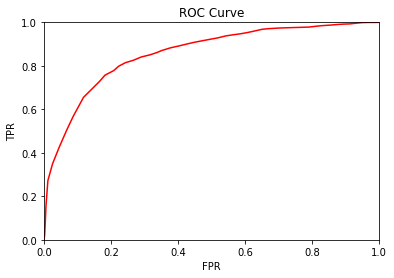

The Computational Time for training the model (in s) =  63.982067346572876


In [ ]:
start_time_train = time.time()
param_grid = {'C': [0.01, 0.1, 10, 100],
              'gamma': [0.01, 0.001],
              'kernel': ['rbf']}

svm_clf = GridSearchCV(svm.SVC(probability=True), param_grid, cv=4)
svm_clf.fit(X_train, y_train)

print("Best paramteres set found:")
print()
print(svm_clf.best_params_)

pred_y_train = svm_clf.predict(X_train)
calc_metric('training', y_train, pred_y_train)
probability = svm_clf.predict_proba(X_train)
plot_roc2(y_train, probability)
end_time_train = time.time()
calc_time("training",start_time_train, end_time_train) 


##**Testing phase**

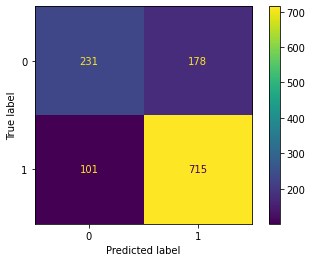

Results for test data

Confusion Matrix is:
 [[231 178]
 [101 715]]

Accuracy is:
 0.7722448979591837


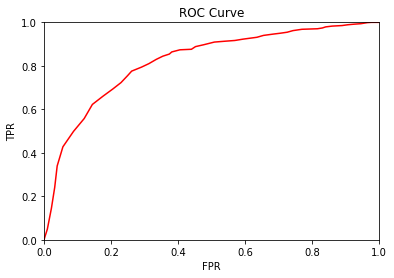

The Computational Time for testing the model (in s) =  0.8708887100219727


In [ ]:
start_time_test = time.time()
pred_y_test = svm_clf.predict(X_test)
calc_metric('test', y_test, pred_y_test)
probability = svm_clf.predict_proba(X_test)
plot_roc2(y_test, probability)
end_time_test = time.time()
calc_time("testing",start_time_test, end_time_test) 